<a href="https://colab.research.google.com/github/Jhonsilvaa/analise-de-sentimentos-em-reviews-de-filmes-do-imdb-com-machine-learning/blob/main/An%C3%A1lise_de_Sentimentos_em_Reviews_de_Filmes_do_IMDB_com_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Sentimentos em Reviews de Filmes do IMDB com Machine Learning
---
No ambiente digital atual, milhões de usuários compartilham suas opiniões sobre filmes em plataformas online como o IMDB. Essas revisões fornecem uma rica fonte de dados textuais, mas seu grande volume torna a análise manual impraticável. Saber rapidamente se uma crítica é positiva ou negativa é importante para os estúdios de cinema, plataformas de streaming e até mesmo para os próprios espectadores que procuram recomendações. Entretanto, já é de se imaginar que classificar automaticamente estas avaliações como positivas ou negativas é uma tarefa complexa e trabalhosa.

<p align=center>
<img src="https://github.com/user-attachments/assets/690c4482-330e-4998-a389-2590bbd4dd15" width="65%"></p>


O objetivo deste projeto é desenvolver um modelo de classificação binária que possa identificar o sentimento expresso em cada review, utilizando machine learning.





## Descrição de Variáveis
Um guia que fornece descrições conceituais de cada variável em nosso conjunto de dados.




* `Review`: os textos das avaliações (reviews) de filmes feitas pelos usuários.
* `Sentiment`: O sentimento associado à avaliação do filme, classificado como 1 (positivo) para avaliações favoráveis e 0 (negativo) para desfavoráveis.

## Importando os Dados

 A importação de dados é o processo de carregamento e leitura de dados em um notebook. Os aspectos que devem ser consideradas na importação de dados são formatos de dados e locais de armazenamento de arquivos de conjuntos de dados. Existem vários formatos de dados que podem ser importados para notebooks, como .csv, .xlsx, .json e assim por diante. Para locais de armazenamento, existem duas opções, nomeadamente a partir de um computador local ou da internet, por meio de um link. Uma importação adequada garante que os dados sejam lidos corretamente e estejam prontos para as etapas seguintes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from PIL import Image
from rich.console import Console
from rich import print as rprint
from rich.table import Table
from rich.panel import Panel
from wordcloud import WordCloud

Neste projeto, os dados utilizados foram obtidos do banco de dados do [Stanford AI Lab](https://ai.stanford.edu/~amaas/data/sentiment/), especificamente do conjunto de dados **Large Movie Review Dataset**

<p align=center>
<img src="https://github.com/user-attachments/assets/e90799fe-d7c6-44d0-8f3e-846c3f9ecfdd" width="20%"></p>

O conjunto original tem cerca de 50000 entradas, estamos utilizando uma versão reduzida que abrangem um total de 10 mil avaliações de filmes extraídas do IMDb. Cada instância corresponde a uma avaliação de filme, categorizada como positiva ou negativa.

In [2]:
from warnings import simplefilter, filterwarnings
simplefilter(action='ignore', category=FutureWarning)

In [3]:
df_imdb_reviews = pd.read_csv('/content/IMDB.csv')
df_imdb_reviews.index = np.arange(1, len(df_imdb_reviews)+1)

Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

## Análise exploratória de dados
Com os dados devidamente coletados, a próxima etapa é a análise exploratória de dados. Nessa etapa, empregamos diversas técnicas e ferramentas para entender melhor os dados coletados, identificando possíveis anomalias, relacionamentos e tendências nos dados.

* Antes de iniciar a análise dos dados, vamos verificar o nosso dataset, analisando as 5 primeiras entradas.

In [ ]:
df_imdb_reviews.head()

,review,sentiment
1,This was obviously the worst movie ever made.....,0
2,Fame did something odd. It was not only a musi...,0
3,"From all the rave reviews, we couldn't wait to...",0
4,"First, let me confess that I have not read thi...",1
5,Mickey Rourke is enjoying a renaissance at the...,0


### **1. Qual é a natureza do conjunto de dados?**

Durante a etapa de análise exploratória de dados, o primeiro passo é a compreensão do seu conjunto de dados, isto é, seu tamanho, a porcentagem de valores ausentes e os tipos de variáveis. O tamanho do conjunto serve para avaliar sua amplitude e, por consequência, sua complexidade. A porcentagem de dados ausentes serve como um parâmetro para medir a quantidade de informações faltantes em comparação ao total do conjunto de dados. Por sua vez, os tipos de variáveis revelam a natureza dos dados.

In [ ]:
table = Table(title='Informações das Variáveis')
table.add_column('Variable_name', justify='center')
table.add_column('Data_type', justify='center')
table.add_column('Unique_value', justify='center')
table.add_column('% of NaN', justify='center')
for column in df_imdb_reviews.columns:
  table.add_row(f'{column}', f'{df_imdb_reviews[column].dtypes}',
                f'{len(df_imdb_reviews[column].unique())}',
                f'{np.divide(df_imdb_reviews[column].isnull().sum(),len(df_imdb_reviews))*100}')

print("Entradas:\t {}".format(df_imdb_reviews.shape[0]))
print("Variáveis:\t {}\n".format(df_imdb_reviews.shape[1]))
rprint(table)

Entradas:	 10000
Variáveis:	 2



               Informações das Variáveis               
┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Variable_name ┃ Data_type ┃ Unique_value ┃ % of NaN ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│    review     │  object   │     9991     │   0.0    │
│   sentiment   │   int64   │      2       │   0.0    │
└───────────────┴───────────┴──────────────┴──────────┘

* Podemos observar a distribuição dos tipos de dados e exibir os resultados em porcentagem.

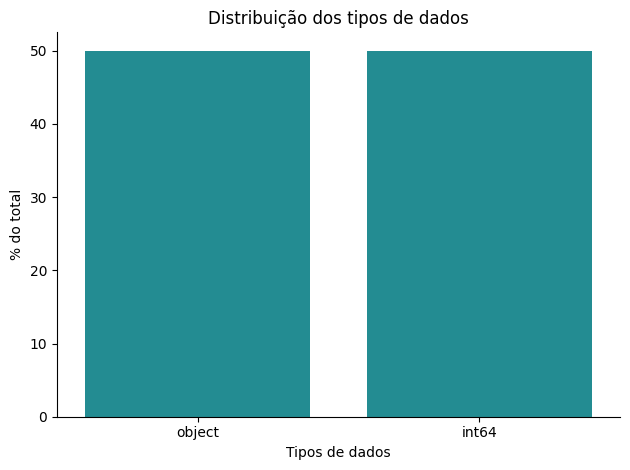

In [ ]:
fig, ax = plt.subplots()
filterwarnings('ignore')
data = (df_imdb_reviews.dtypes.value_counts(normalize=True)*100).round(2)
sns.barplot(x=data.index.astype(str), y=data.values,palette=['#119DA4', "#119DA4"])
plt.title('Distribuição dos tipos de dados')
plt.xlabel('Tipos de dados')
plt.ylabel('% do total')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()

Com base nas informações fornecidas, podemos observar que:

* É possível identificar que a variável `sentiment` é o nosso atributo alvo.

* Não há valores ausentes no conjunto de dados.

* A maioria dos dados no dataset é do tipo `object` (50%) e  `Int64` (50%)

* Observamos que a coluna `review` que são os textos das avaliações de filmes feitas pelos usuários, apresenta valores duplicados. Nesta etapa, realizaremos a correção necessária para essa inconsistência.

 Identificando as linhas que têm valores duplicados na coluna `review`.

In [4]:
df_duplicates = df_imdb_reviews[df_imdb_reviews['review'].duplicated(keep=False)].sort_values('review').copy()
print(f'Qtd de valores duplicados: {len(df_duplicates)} \n')
df_duplicates.head()

Qtd de valores duplicados: 18 



,review,sentiment
9284,A lot about USA The Movie can be summed up in ...,1
2382,A lot about USA The Movie can be summed up in ...,1
5212,An updated version of a theme which has been d...,0
9476,An updated version of a theme which has been d...,0
3655,I and a friend rented this movie. We both foun...,0


Removendo linhas específicas que estão dupliacadas e mantendo a primeira ocorrência.

In [5]:
df_imdb_reviews.drop_duplicates(subset='review', keep='first', inplace=True)
df_imdb_reviews.index = np.arange(1, len(df_imdb_reviews)+1)
print(f'Qtd de valores unicos: {len(df_imdb_reviews.review.unique())}')
print(f'Entradas: {len(df_imdb_reviews)}\n')
df_imdb_reviews.head()

Qtd de valores unicos: 9991
Entradas: 9991



,review,sentiment
1,This was obviously the worst movie ever made.....,0
2,Fame did something odd. It was not only a musi...,0
3,"From all the rave reviews, we couldn't wait to...",0
4,"First, let me confess that I have not read thi...",1
5,Mickey Rourke is enjoying a renaissance at the...,0


### **2. O dataset está balanceado?**

Quando se trata de classificação Binaria, uma das questões mais importantes a serem consideradas é se o conjunto de dados em questão está balanceado ou não. A distribuição dos dados pode ter um grande impacto no desempenho do modelo, e o desequilíbrio dos dados é um problema comum em muitos conjuntos de dados.

% de Positivos: 0.50
% de negativos: 0.49 



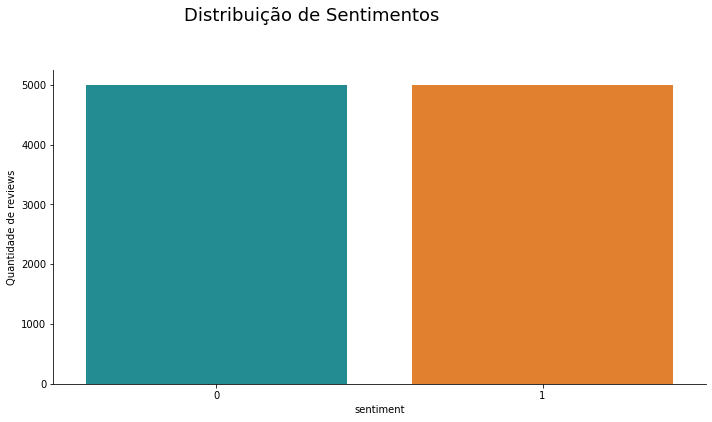

In [ ]:
proportion = df_imdb_reviews.sentiment.value_counts(normalize=True).values
fig, ax = plt.subplots(figsize=(10, 6), dpi=72)
sns.countplot(data=df_imdb_reviews, x='sentiment', palette=["#119DA4", '#FF7F11'], linewidth=0, edgecolor="none", ax=ax)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.text(-0.1, 6000, 'Distribuição de Sentimentos', fontsize=18, fontweight='medium', va='bottom', color='black')
ax.set_ylabel('Quantidade de reviews')
ax.set_xlabel('sentiment')
print(f'% de Positivos: {str(proportion[0])[:4]}\n% de negativos: {str(proportion[1])[:4]} \n')
plt.tight_layout()

O dataset apresenta uma distribuição equilibrada entre as classes de sentimento, com 50% de avaliações positivas (classificadas como 1) e 49% de avaliações negativas (classificadas como 0). Essa proporção indica que não há desbalanceamento significativo entre as classes.

### **3. Quais palavras são mais frequentes em cada sentimento?**

Uma etapa interessante na análise textual é a visualização das palavras mais frequentes no nosso dataset. Ao identificar as palavras mais associadas a cada sentimento, podemos compreender melhor o que leva os espectadores a avaliarem um filme de forma positiva ou negativa. Essa visualização também nos permite identificar padrões linguísticos que o modelo de machine learning provavelmente utilizará para classificar as avaliações.

Em seguida, usaremos a biblioteca WordCloud para criar uma função que gerará nuvens de palavras, possibilitando uma análise visual das palavras mais comuns em avaliações positivas (sentimento 1) e negativas (sentimento 0).

In [ ]:
def custom_wordcloud(review, mask, colormap, background_color='black'):
  wordcloud = WordCloud(background_color=background_color,
                      width=1000, height=1000, max_words=2000,
                      mask=mask, max_font_size=200,
                      min_font_size=1, colormap=colormap).generate(review)
  fig, ax = plt.subplots(figsize=(10,5))
  ax.imshow(wordcloud, interpolation='bilinear')
  ax.set_axis_off()
  plt.tight_layout()

Vamos começar analisando as reviews positivas. Para isso, utilizaremos uma máscara personalizada em formato de clapperboard, que adicionará um elemento visual interessante à nuvem de palavras.

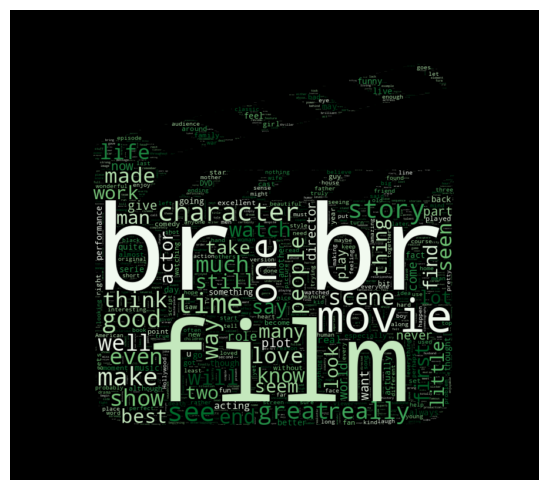

In [ ]:
clapperboard_mask = np.array(Image.open("/content/png-clipart-clapperboard-design-angle-rectangle-Photoroom.png"))
positive_reviews = df_imdb_reviews[df_imdb_reviews.sentiment == 1].review.values.copy()
positive_summary = " ".join(s for s in positive_reviews)
custom_wordcloud(positive_summary, clapperboard_mask,
                 colormap='Greens')

Agora, vamos passar para a análise das reviews negativas. Utilizando a mesma máscara, iremos gerar uma nuvem de palavras que destacará os termos mais comuns nas avaliações classificadas com o sentimento negativo

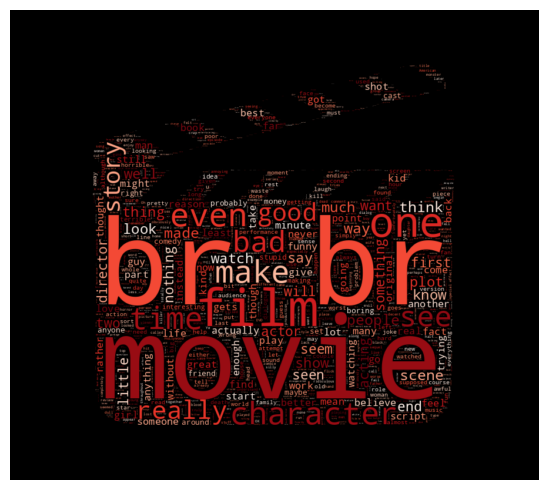

In [ ]:
negative_reviews = df_imdb_reviews[df_imdb_reviews.sentiment == 0].review.values.copy()
negative_summary = " ".join(s for s in negative_reviews)
custom_wordcloud(negative_summary, clapperboard_mask,
                 colormap='Reds')

Podemos observar que as nuvens de palavras estão sendo poluídas por termos que não estão diretamente associados a sentimentos positivos ou negativos. Por exemplo, palavras como "br", "movie", "film", "one" não têm relação com sentimentos e aparecem com muita frequência no dataset. Para que o modelo tenha um bom desempenho, é necessário realizar uma limpeza dos dados.

##  Pré-processamento de dados

Com base nos resultados da análise exploratória, podemos direcionar nossos esforços para o pré-processamento dos dados. Essa etapa inclui uma série de atividades que têm como objetivo preparar os dados para modelagem, tornando-os mais adequados para uso em modelos e algoritmos. As atividades que realizamos incluem limpeza dos dados, remoção de valores ausentes, normalização, codificação de variáveis e inclui a divisão dos dados em conjuntos de treinamento e teste e entre outros.

In [ ]:
!pip install contractions emoji
import re
import emoji
import string
import contractions
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

Realizando o download dos pacotes essenciais da biblioteca NLTK que serão utilizados ao longo do projeto.




In [ ]:
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')

### **Limpeza de dados**
O sucesso de qualquer modelo de machine learning, especialmente em tarefas de processamento de linguagem natural (PLN), depende da qualidade dos dados. Textos brutos geralmente incluem elementos que não são relevantes para o modelo, como tags HTML, URLs, números e caracteres especiais etc... A limpeza de dados consiste na remoção ou transformação desses elementos para garantir que apenas a informação relevante seja mantida.

* **Normalização de texto**

A normalização de texto busca garantir a uniformidade e a consistência nos dados. Uma das maneiras mais simples de realizar essa normalização é converter todo o texto para letras minúsculas, um processo conhecido como lowercasing. O lowercasing é útil porque muitos modelos tratam palavras com letras maiúsculas e minúsculas como se fossem diferentes. Ao converter todas as palavras para minúsculas, garantimos que palavras idênticas com capitalização diferente sejam tratadas de forma uniforme.

In [8]:
df_imdb_reviews['review'] = df_imdb_reviews['review'].str.lower()

* **Remoção de Tags HTML e URLs**

Tags HTML e URLs são frequentes em datasets textuais de fontes online e podem afetar negativamente a interpretação do texto por modelos de machine learning. Embora sejam comuns, esses elementos não adicionam valor ao conteúdo. Para melhorar a qualidade dos dados, é necessário identificá-los e removê-los.

In [9]:
df_imdb_reviews['review'] = df_imdb_reviews['review'].apply(lambda text: re.sub(r'<.*?>', '', text))
df_imdb_reviews['review'] = df_imdb_reviews['review'].apply(lambda text: re.sub(r'https?://\S+|www\.\S+', '', text))

* **Tratamento de ChatWords e Emojies**

ChatWords são gírias e abreviações comuns na comunicação online, utilizadas em mensagens de texto e redes sociais. Emojis são símbolos que expressam emoções e complementam o texto. Ambos impactam a comunicação digital, mas podem causar problemas em processamento de linguagem natural. ChatWords podem ser mal interpretados por algoritmos, enquanto emojis, apesar de transmitirem emoções, não têm representação textual clara. Para resolver essas questões, é importante converter ChatWords em formas padrão e substituir emojis por representações textuais ou categorias de sentimento.

Abaixo, criei uma função chamada `convert_chat_words` que tem como objetivo
substituir os chatwords mapeados em texto.

In [10]:
def convert_chat_words(text, chat_words):
    words = text.split()
    converted_words = []
    for word in words:
        if word.lower() in chat_words:
            converted_words.append(chat_words[word.lower()])
        else:
            converted_words.append(word)
    converted_text = " ".join(converted_words)
    return converted_text.lower()

Aqui, estou aplicando a função`convert_chat_words` nas reviews e também estou removendo possiveis emojis.

In [11]:
df_chatwords = pd.read_csv('/content/chatwords')
chat_words = dict(df_chatwords[['Abbreviation', 'Meaning']].values)
df_imdb_reviews['review'] = df_imdb_reviews['review'].apply(lambda text: convert_chat_words(text, chat_words))
df_imdb_reviews['review'] = df_imdb_reviews['review'].apply(lambda text:emoji.replace_emoji(text, replace=''))

* **Tratamento de contrações**

Contrações são palavras ou combinações de palavras que são encurtadas pela eliminação de letras e sua substituição por um apóstrofo.
O tratamento de contrações é uma maneira de deixar a escrita mais uniforme e fácil de entender. Substituir contrações, como "isn't" por "is not" ou "can't" por "cannot", torna a linguagem mais formal e clara.

In [12]:
df_imdb_reviews['review'] = df_imdb_reviews['review'].apply(lambda text: contractions.fix(text).lower())

* **Remoção de caracteres especiais e pontuação**

As pontuações ou caracteres especiais, assim como as tags HTML e as URLs, dificultam a compreensão semântica do texto e podem causar ruído nos dados, dificultando que o modelo descubra padrões e interprete sentimentos corretamente.

In [13]:
df_imdb_reviews['review'] = df_imdb_reviews['review'].apply(lambda text: text.translate(str.maketrans('', '', string.punctuation)))
df_imdb_reviews['review'] = df_imdb_reviews['review'].apply(lambda text: re.sub(r'[^\w\s]', '', text))

* **Remoção de números e espaços extras**

A remoção de números e espaços extras desempenha um papel importante na preparação do texto, pois ajuda a eliminar elementos que podem criar ambiguidades e dificultar a extração de informações importantes. quando eliminamos números irrelevantes e espaços desnecessários, o texto se torna mais claro e homogêneo, o que facilita a identificação de características relevantes pelo modelo de machine learning.

In [14]:
df_imdb_reviews['review'] = df_imdb_reviews['review'].apply(lambda text: re.sub(r'\d+', '', text))
df_imdb_reviews['review'] = df_imdb_reviews['review'].apply(lambda text: ' '.join(text.split()))

### **Tokenização**

Tokenização é o processo de dividir um texto em unidades menores chamadas tokens. Esses tokens podem ser palavras individuais, frases ou outros elementos significativos, dependendo da tarefa e dos requisitos específicos. Ao tokenizar, tornamos o texto legível para o modelo, permitindo o mapeamento de cada token em uma representação numérica.

In [15]:
df_imdb_reviews['processed_review'] = df_imdb_reviews['review'].apply(lambda text: word_tokenize(text))

### **Stopwords**

Stopwords são palavras comuns que geralmente não agregam muito significado em tarefas de processamento de linguagem natural, como `and`, `or`, `the`, `a`, `an`. Essas palavras são comuns, mas geralmente não adicionam muito significado para o contexto geral da frase e, por isso, são frequentemente excluídas em análises de texto.  Ao removê-las, garantimos que o foco do nosso modelo seja nas palavras mais importantes.

In [16]:
stop_words = set(stopwords.words('english'))
df_imdb_reviews['processed_review'] = df_imdb_reviews['processed_review'].apply(lambda text: ' '.join([word for word in text if word not in stop_words]))

### **Lematização**

A Lematização é um processo em PNL que envolve reduzir palavras à sua forma base ou de dicionário, chamada de lema. O objetivo da lematização é normalizar palavras convertendo-as para uma forma comum para que palavras com significados similares sejam agrupadas. Essa tecnica considera o contexto e a classe gramatical (POS) da palavra para determinar o lema correto. Por exemplo, considere as palavras `running`, `ran` e `runs`. Após a lematização, todas essas palavras seriam reduzidas ao lema `run`.

In [17]:
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N": wordnet.NOUN,"V": wordnet.VERB,
               "J": wordnet.ADJ,"R": wordnet.ADV}

def lemmatize_text(text):
    tokens = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    lemmatized_words = []
    for word, tag in pos_tags:
        pos = wordnet_map.get(tag[0].upper(), wordnet.NOUN)
        lemmatized_word = lemmatizer.lemmatize(word, pos=pos)
        lemmatized_words.append(lemmatized_word)
    return ' '.join(lemmatized_words)

df_imdb_reviews['processed_review'] = df_imdb_reviews['processed_review'].apply(lemmatize_text)

### **Separando entre Treino e Teste**
A separação de dados em treino e teste é um processo importante em machine learning. O objetivo é dividir os dados em dois conjuntos: um para treinar o modelo e outro para testá-lo. Isso é feito para evitar que o modelo seja treinado de forma a se adaptar apenas aos dados de treino, o que pode levar a problemas como overfitting.


In [18]:
feature = df_imdb_reviews.drop(columns=['review', 'sentiment']).copy()
target = df_imdb_reviews.sentiment.copy()
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.20, random_state=0,shuffle=True)

**Conjunto de Treino**

O conjunto de dados de treinamento é utilizado para treinar o modelo, desenvolver o pipeline de processamento dos dados e criar nossa baseline. Esta baseline será usada como referência para selecionar o modelo que será otimizado.

In [19]:
print(f'X_train: shape:{X_train.shape}')
print(f'y_train: shape:{y_train.shape}')

X_train: shape:(7992, 1)
y_train: shape:(7992,)


**Conjunto de Teste**

Esse conjunto é utilizado apenas no final, com o seu modelo pronto, e otimizado, para testar o resultado do modelo pronto com dados novos, da mesma forma que ele receberá esses dados no mundo real.

In [20]:
print(f'X_test: shape:{X_test.shape}')
print(f'y_test: shape:{y_test.shape}')

X_test: shape:(1999, 1)
y_test: shape:(1999,)


### **TF-IDF (Term Frequency - Inverse Document Frequency)**

O TF-IDF é um cálculo estatístico utilizado como uma forma de quantificar palavras em conjuntos de documentos. Normalmente, o processo computa uma pontuação de cada palavra para significar a sua importância ao longo do corpus. O cálculo do TF-IDF envolve duas componentes principais: a frequência do termo (TF) e o inverso da frequência do documento (IDF).

A frequência do termo é definida como a razão entre o número de vezes que um termo aparece em um documento e o total de termos no documento. A fórmula é expressa como:

$$
TF(t, d) = \frac{f_{t,d}}{N_d}
$$

* $f_{t,d}$ é o número de vezes que o termo $t$ aparece no documento
$d$.

* $N_d$ é o total de termos no documento $d$


O IDF mede a informação que um termo fornece, considerando sua distribuição em todos os documentos. A fórmula para calcular o IDF é:

$$IDF(t, D) = \log\left(\frac{N}{n_t}\right)$$

* $N$ é o total de documentos no corpus.

* $n_t$ é o número de documentos que contêm o termo $t$.

Finalmente, o valor do TF-IDF é obtido multiplicando-se os dois componentes:


$$TF-IDF(t, d, D) = TF(t, d) \times IDF(t, D)$$


In [21]:
vectorizer = TfidfVectorizer(analyzer='word')
X_train_vectorizer = vectorizer.fit_transform(list(X_train['processed_review'].values.tolist()))
X_train_vectorizer = X_train_vectorizer.toarray()
X_train_transform = pd.DataFrame(X_train_vectorizer, columns=vectorizer.get_feature_names_out())

Aqui, iremos transformar a matriz TF-IDF em um DataFrame. Assim, cada coluna vai representar uma palavra do vocabulário.

In [22]:
X_train_transform = pd.DataFrame(X_train_vectorizer, columns=vectorizer.get_feature_names_out())

Com os dados devidamente transformados e sem a necessidade de ajustes adicionais, é possível iniciar a modelagem de Machine Learning.

##  Modelagem de Machine Learning

Depois do pré-processamento de dados, o próximo passo é a criação do modelo. Isso envolve a escolha dos algoritmos de Machine learning mais adequado para o problema e a definição dos parâmetros dos modelos.

In [ ]:
!pip install scikit-optimize
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from skopt import gp_minimize
from skopt.space import Real, Integer, Categorical
from skopt.utils import use_named_args

### **Modelo Baseline de desempenho dos Modelos**


O modelo baseline é um modelo simples que nos ajuda a entender o mínimo de desempenho que podemos esperar. Ele serve como uma linha de base para medir o desempenho de modelos mais complexos que desenvolveremos posteriormente.

Irei usar a cross-validation para estimar o erro da baseline dos modelos iniciais.  A métrica utilizada para avaliação será `F1-score`.

O modelo `RandomForestClassifier` esta sendo utilizado como baseline de desempenho para os demais modelos que iremos testar.

In [ ]:
pipe = Pipeline(steps=[
        ('vectorizer', TfidfVectorizer()),
        ('regressor', RandomForestClassifier())])

scores = cross_val_score(pipe, X_train['processed_review'].values.tolist(), y_train, cv=5, scoring='f1')
print(f'F1-score: {np.mean(scores)}')
print(f'Deviation: {np.std(scores)}')

F1-score: 0.8270114129482666
Deviation: 0.008945694248448195


### **Teste de Performance dos Modelos**

Para avaliar a performance dos modelos de regressão, aplicarei a validação cruzada em diferentes algoritmos de machine learning. O objetivo é identificar o modelo com o maior F1-score. Os modelos selecionados para essa análise são:

* MultinomialNB
* XGboost
* LightGBM
* AdaBoost

In [24]:
xgb = XGBClassifier()
adb = AdaBoostClassifier()
lgbm = LGBMClassifier()
mnb = MultinomialNB()

A seguir, com o objetivo de avaliar o desempenho dos modelos escolhidos, estou utilizando a validação cruzada para cada modelo, armazenando os nomes e as pontuações de F1-score em listas. Em seguida, essas listas são convertidas em um DataFrame do pandas que organiza as pontuações dos modelos em uma tabela para uma análise mais fácil e comparativa.

In [ ]:
models = []
scores = []
for model in (mnb, xgb, adb, lgbm):
    pipeline = Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                               ('model', model)])
    model_name = model.__class__.__name__
    score = cross_val_score(pipeline,  X_train['processed_review'].values.tolist(),
                             y_train, cv=10, scoring='f1')
    models.append(model_name)
    scores.append(score)

df_classifiers_models = pd.DataFrame(scores, index=models).T

* Antes de iniciar a análise dos resultados dos modelos, vamos examinar nosso dataset verificando as cinco primeiras entradas.

In [26]:
df_classifiers_models.head()

,MultinomialNB,XGBClassifier,AdaBoostClassifier,LGBMClassifier
0,0.836601,0.855055,0.780997,0.849148
1,0.843215,0.841328,0.765237,0.856436
2,0.872396,0.845771,0.775701,0.855330
3,0.839474,0.816936,0.747525,0.833124
4,0.813776,0.811344,0.761376,0.823239


* Com o método `describe`, geraremos estatísticas para os nossos modelos, a fim de compreender melhor seu desempenho.

In [27]:
df_classifiers_models.describe()

,MultinomialNB,XGBClassifier,AdaBoostClassifier,LGBMClassifier
count,10.000000,10.000000,10.000000,10.000000
mean,0.839641,0.829311,0.759618,0.843963
std,0.017379,0.015695,0.017956,0.011225
min,0.813776,0.811344,0.727932,0.823239
25%,0.830911,0.816325,0.750063,0.837579
50%,0.838037,0.825255,0.763307,0.844189
75%,0.843111,0.842009,0.774000,0.853785
max,0.872396,0.855055,0.780997,0.857849


* O modelo `LightGBM` se sobressai tanto em termos de desempenho médio de f1-score(0.84) quanto em variabilidade(0.11). Em suma é o melhor modelo em perfomance média e o mais consistente. Não muito atrás do `LightGBM`, temos os modelos `MultinomialNB` e `XGBClassifier`, com desempenhos muito próximos em F1-score médio (0.839 e 0.829).

* Dentre todos os modelos, O `AdaBoostClassifier` foi o pior seja em desempenho médio(0.75) ou em variabilidade(0.0179).


### **Otimização dos Hiperparâmetro - Bayesian Optimization**

 A Otimização Bayesiana é um método que busca encontrar o conjunto de hiperparâmetros que maximiza a performance do modelo de forma eficiente. Ao contrário da random search ou de grid search, a Otimização Bayesiana usa um modelo probabilístico para selecionar os conjuntos de hiperparâmetros. O processo começa com a definição de uma função de aquisição, que decide quais hiperparâmetros testar em seguida, com base no modelo probabilístico. Um dos métodos mais comuns para a função de aquisição é a Expected Improvement (EI), que escolhe os hiperparâmetros que têm a maior expectativa de melhorar o desempenho em relação ao melhor resultado obtido até o momento. No python, uma das bibliotecas mais populares para realizar Otimização Bayesiana é o `Scikit-Optimize (skopt)`.

#### **LightGBM(Light Gradient Boosting Machine)**

Light GBM, abreviação de Light Gradient Boosting Machine, é uma implementação de alto desempenho, distribuída e de código aberto do framework gradient boosting. Foi desenvolvido pela Microsoft e é projetado para treinamento eficiente e distribuído em conjuntos de dados muito grandes. Ele é uma implementação eficiente do algoritmo de gradient boosting. O Light GBM se destaca devido à sua abordagem única para construir árvores de decisão. Diferentemente dos métodos tradicionais de aumento de gradiente, que usam crescimento de árvore em profundidade, o Light GBM emprega uma estratégia de crescimento de árvore folha a folha.

Utilizando a biblioteca skopt, definimos um espaço de busca que inclui seis hiperparâmetros importantes para o algoritmo LightGBM:

* `num_leaves`: Máximo de folhas de árvore para aprendizes base.

* `min_child_samples`: Número mínimo de dados necessários em um filho (folha).

* `learning_rate`: Taxa de aprendizado.

* `subsample`: Proporção de subamostragem da instância de treinamento.

* `colsample_bytree`: Proporção de subamostragem de colunas ao construir cada árvore.

* `n_estimators`: Número de árvores impulsionadas para ajustar.


In [ ]:
lgbm_space  = [
    Integer(2, 128, name='num_leaves'),
    Integer(1, 100, name='min_child_samples'),
    Real(1e-3, 1e-1, prior='log-uniform', name='learning_rate'),
    Real(0.05, 1.0, name='subsample'),
    Real(0.05, 1.0, name='colsample_bytree'),
    Integer(100, 1000, name='n_estimators'),
]

Aqui, criei uma função chamada `lgbm_objective` que será usada para avaliar o desempenho do modelo LightGBM em relação aos hiperparâmetros que estão sendo otimizados.

In [ ]:
@use_named_args(lgbm_space)
def lgbm_objective(**params):
    model = LGBMClassifier(**params, verbose=-1)
    pipeline = Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                               ('model', model)])
    scores = cross_val_score(pipeline,  X_train['processed_review'].values.tolist(),
                             y_train, cv=5, scoring='f1')
    return - np.mean(scores)

A seguir, irei executar o processo de otimização bayesiana para ajustar os hiperparâmetros do LightGBM.

In [ ]:
lgbm_result = gp_minimize(lgbm_objective, lgbm_space, n_calls=50, random_state=0, n_random_starts=10)
print(f'Best hyperparameters {lgbm_result.x}')
print(f'Best F1-score {- lgbm_result.fun}')

Best hyperparameters [86, 1, 0.026190207177140327, 0.05, 0.05, 1000]
Best F1-score 0.8694200724129241


A otimização revelou que os hiperparâmetros selecionados com `num_leaves` de **86**, `min_child_samples` de **1**, `learning_rate` de **0.02619**, `subsample` de **0.05**, `colsample_bytree` de **0.05** e `n_estimators` de **1000** conseguiram alcançar um F1-score de **0.869**

#### **AdaBoost (Adaptive Boosting)**

AdaBoost é um dos métodos mais populares de Boosting, conceito que se refere a combinação de diversos modelos de aprendizagem fracos para criar um modelo de aprendizagem forte. A principal ideia por trás do AdaBoost é ajustar adaptativamente os pesos dos exemplos de treinamento, focando nos exemplos que foram incorretamente classificados em iterações anteriores.

Utilizando a biblioteca skopt, criei um espaço de busca que inclui três hiperparâmetros importantes para o algoritmo AdaBoost:

* `n_estimators`: O número máximo de estimadores em que o boosting é encerrado.

* `algorithm`: Especifica qual variante do algoritmo AdaBoost será utilizada.

* `learning_rate`: Peso aplicado a cada classificador em cada iteração de reforço.



In [ ]:
ada_space = [
    Integer(10, 500, name='n_estimators'),
    Categorical(['SAMME', 'SAMME.R'], name='algorithm'),
    Real(1e-6, 1e-1, prior='log-uniform', name='learning_rate')
]

Aqui, criei uma função chamada `ada_objective` que será usada para avaliar o desempenho do modelo AdaBoost em relação aos hiperparâmetros que estão sendo otimizados.

In [ ]:
@use_named_args(ada_space)
def ada_objective(**params):
    model = AdaBoostClassifier(**params)
    pipeline = Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                               ('model', model)])
    scores = cross_val_score(pipeline,  X_train['processed_review'].values.tolist(),
                             y_train, cv=5, scoring='roc_auc')
    return - np.mean(scores)

A seguir, irei executar o processo de otimização bayesiana para ajustar os hiperparâmetros do AdaBoost.

In [ ]:
ada_result = gp_minimize(ada_objective, ada_space,n_calls=50,random_state=0, n_random_starts=10)
print(f'Best hyperparameters {ada_result.x}')
print(f'Best F1-score {-ada_result.fun}')

Best hyperparameters [471, 'SAMME.R', 0.09988291730494123]
Best F1-score 0.8230916403310324


Os resultados da otimização revelaram que os hiperparâmetros selecionados, com `n_estimators` de **471**, `algorithm` **SAMME.R**, e uma `learning_rate` de **0.0998** alcançaram um F1-score de **0.823**

#### **XGBoost(eXtreme Gradient Boosting)**

eXtreme Gradient Boosting (XGBoost) é uma implementação escalável e altamente precisa de aumento de gradiente que expande os limites do poder de computação para algoritmos de árvore aumentada, sendo construído em grande parte para energizar o desempenho do modelo de aprendizado de máquina e a velocidade computacional. Com o XGBoost, as árvores são construídas em paralelo, em vez de sequencialmente como o GBDT. Ele segue uma estratégia de nível, escaneando valores de gradiente e usando essas somas parciais para avaliar a qualidade das divisões em cada divisão possível no conjunto de treinamento.

Utilizando a biblioteca skopt, definimos um espaço de busca que inclui cinco hiperparâmetros importantes para o algoritmo XGBoost:

* `learning_rate`:Taxa de aprendizado do modelo.

* `n_estimators`: Número de árvores de decisão.

* `max_depth`: Profundidade máxima de cada árvore de decisão.

* `min_child_weight`: Soma mínima do peso da instância (hessian) necessária em um nó filho.

* `gamma`: Redução mínima de perda necessária para fazer uma partição adicional em um nó folha da árvore.


In [ ]:
xgb_space = [
    Real(0.0001, 1.0, name='learning_rate', prior='log-uniform'),
    Integer(100, 500, name='n_estimators'),
    Integer(1, 10, name='max_depth'),
    Integer(1, 10, name='min_child_weight'),
    Real(0.1, 1.0, name='gamma', prior='uniform')
]

Aqui, criei uma função chamada `xgb_objective` que será usada para avaliar o desempenho do modelo XGBoost em relação aos hiperparâmetros que estão sendo otimizados.

In [ ]:
@use_named_args(xgb_space)
def xgb_objective(**params):
    model = XGBClassifier(**params)
    pipeline = Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                               ('model', model)])
    scores = cross_val_score(pipeline,  X_train['processed_review'].values.tolist(),
                             y_train, cv=5, scoring='roc_auc')
    return - np.mean(scores)

A seguir, irei executar o processo de otimização bayesiana para ajustar os hiperparâmetros do XGBoost.

In [ ]:
xgb_result = gp_minimize(xgb_objective,xgb_space, n_calls=50, random_state=0, n_random_starts=10)
print(f'Best hyperparameters {xgb_result.x}')
print(f'Best F1-score {- xgb_result.fun}')

Best hyperparameters [0.2561427234355878, 500, 3, 1, 1.0]
Best F1-score 0.8444034460750232


A otimização revelou que os hiperparâmetros selecionados com um `learning_rate` de **0.2561**, `n_estimators` de **500**, `max_depth` de **3**, `min_child_weight` de **1** e `gamma` de **1.0** conseguiram alcançar um F1-score de **0.844**.

#### **MultinomialNB(Multinomial Naive Bayes)**

Naive Bayes é uma técnica de classificação que é baseada no Teorema de Bayes com uma suposição de que todos os recursos que preveem o valor alvo são independentes uns dos outros. Ele calcula a probabilidade de cada classe e então escolhe aquela com a maior probabilidade. O MultinomialNB é uma variação do Naive Bayes que pertence à família de classificadores bayesianos, e é particularmente adequado para dados representados por contagens inteiras, como a frequência de palavras em um documento. O modelo MultinomialNB modela os dados usando uma distribuição multinomial; isso é diferente de outros tipos de Naive Bayes, como GaussianNB, que trabalha com variáveis contínuas.


Utilizando a biblioteca skopt, definimos um espaço de busca que inclui um hiperparâmetro importante para o algoritmo MultinomialNB:

* `alpha`: Parâmetro de suavização aditivo (Laplace/Lidstone).

In [ ]:
mnb_space = [Real(1e-10, 10, name='alpha')]

Aqui, criei uma função chamada `mnb_objective` que será usada para avaliar o desempenho do modelo MultinomialNB em relação ao hiperparâmetro que estão sendo otimizado.

In [ ]:
@use_named_args(mnb_space)
def mnb_objective(**params):
    model = MultinomialNB(**params)
    pipeline = Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                               ('model', model)])
    scores = cross_val_score(pipeline,  X_train['processed_review'].values.tolist(),
                             y_train, cv=5, scoring='roc_auc')
    return - np.mean(scores)

A seguir, irei executar o processo de otimização bayesiana para ajustar o hiperparâmetro do MultinomialNB.

In [ ]:
mnb_result = gp_minimize(mnb_objective, mnb_space, verbose=1, n_calls=200, random_state=0, n_random_starts=10)
print(f'Best hyperparameters {mnb_result.x}')
print(f'Best F1-score {- mnb_result.fun}')

Best hyperparameters [0.4482898881919245]
Best F1-score 0.8379777633374589


A otimização identificou que o hiperparâmetro `Alpha`, com valor de **0.4482**, resultou em um F1-score de **0.8379**.

## Avaliar o desempenho do modelo
A avaliação é a etapa onde testamos se nosso modelo é capaz de cumprir a missão que foi definida para ele. É nessa fase que utilizamos diferentes métricas e técnicas para avaliar a eficácia do modelo em relação aos dados de teste. Mas não é só isso! Também avaliamos se o modelo é capaz de lidar com novos dados que não foram usados no treinamento e se ele é robusto o suficiente para lidar com diferentes cenários e variações.

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

No início do projeto, dividimos os dados em dois conjuntos: um de treino e outro de teste. Agora que já exploramos, preparamos os dados e otimizamos os hiperparâmetros, é hora de avaliar o potencial do modelo com os dados de teste. No entanto, para que os resultados sejam justos, é necessário garantir que os novos dados estejam nas mesmas condições dos dados de treinamento, aos quais aplicamos as transformações.

In [ ]:
X_test_vectorizer = vectorizer.transform(list(X_test['processed_review'].values.tolist()))
X_test_transform = pd.DataFrame(X_test_vectorizer.toarray(), columns=vectorizer.get_feature_names_out())

### **Avaliação de Desempenho do Modelo LightGBM**
Utilizaremos os hiperparâmetros otimizados anteriormente para treinar o modelo LightGBM. Em seguida, avaliaremos seu desempenho preditivo nos dados de teste, utilizando o F1-score como a métrica principal. Outras métricas, como Acurácia, Precisão e recall serão utilizadas como suporte para uma avaliação mais abrangente.


In [ ]:
lgbm_params ={'num_leaves':86,'min_child_samples':1,
              'learning_rate':0.026190207177140327, 'subsample':0.05, 'random_state':0,
              'colsample_bytree':0.05,'n_estimators':1000, 'verbose':0}
lgbm_model = LGBMClassifier(**lgbm_params)
lgbm_model.fit(X_train_transform, y_train)
y_pred_lgbm = lgbm_model.predict(X_test_transform)
y_pred_proba_lgbm = lgbm_model.predict_proba(X_test_transform)[:, 1]
roc_auc_lgbm = roc_auc_score(y_test, y_pred_proba_lgbm)
print(classification_report(y_test, y_pred_lgbm))
print(f"ROC AUC (LightGBM): {roc_auc_lgbm}")

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       976
           1       0.85      0.85      0.85      1023

    accuracy                           0.85      1999
   macro avg       0.85      0.85      0.85      1999
weighted avg       0.85      0.85      0.85      1999

ROC AUC (LightGBM): 0.9293052817973495


Abaixo, iremos gerar uma matriz de confusão para visualizar o desempenho do modelo de LightGBM. A matriz de confusão nos permite observar a distribuição das previsões corretas e incorretas feitas pelo modelo, mostrando a relação entre os rótulos reais e os previstos.

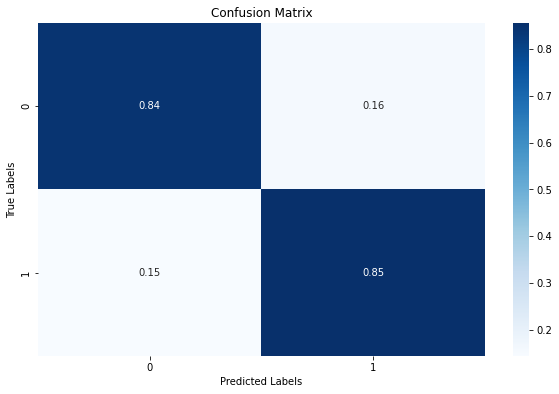

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=72)
sns.heatmap(confusion_matrix(y_test, y_pred_lgbm, normalize='true'), annot=True, fmt='.2f', cmap='Blues')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
plt.show()

O modelo LightGBM apresentou o melhor equilíbrio geral entre precisão e recall, com um F1-score de 0.85, além de ter a maior capacidade de discriminação entre as classes, AUC de 0.9293, e a maior acurácia, 0.85, entre os modelos testados.

### **Avaliação de Desempenho do Modelo AdaBoost**
Utilizaremos os hiperparâmetros otimizados anteriormente para treinar o modelo AdaBoost. Em seguida, avaliaremos seu desempenho preditivo nos dados de teste, utilizando o F1-score como a métrica principal. Outras métricas, como Acurácia, Precisão e recall serão utilizadas como suporte para uma avaliação mais abrangente.

In [ ]:
ada_params ={'n_estimators':471, 'algorithm':'SAMME.R',
             'learning_rate':0.09988291730494123,'random_state':0}
ada_model = AdaBoostClassifier(**ada_params)
ada_model.fit(X_train_transform, y_train)
y_pred_ada = ada_model.predict(X_test_transform)
y_pred_proba_ada = ada_model.predict_proba(X_test_transform)[:, 1]
roc_auc_ada = roc_auc_score(y_test, y_pred_proba_ada)
print(classification_report(y_test, y_pred_ada))
print(f"ROC AUC (AdaBoost): {roc_auc_ada}")

              precision    recall  f1-score   support

           0       0.83      0.75      0.79       976
           1       0.78      0.86      0.82      1023

    accuracy                           0.80      1999
   macro avg       0.81      0.80      0.80      1999
weighted avg       0.81      0.80      0.80      1999

ROC AUC (AdaBoost): 0.8936534501546401


Abaixo, iremos gerar uma matriz de confusão para visualizar o desempenho do modelo de AdaBoost. A matriz de confusão nos permite observar a distribuição das previsões corretas e incorretas feitas pelo modelo, mostrando a relação entre os rótulos reais e os previstos

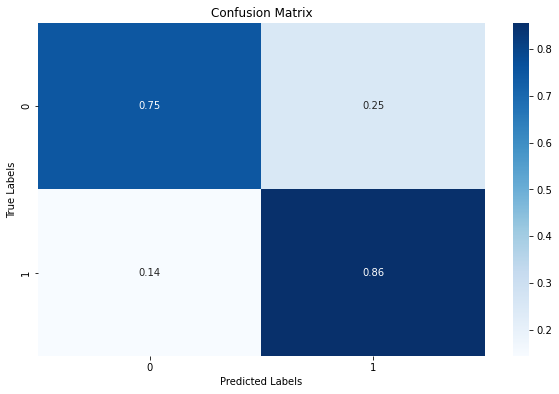

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=72)
sns.heatmap(confusion_matrix(y_test, y_pred_ada, normalize='true'), annot=True, fmt='.2f', cmap='Blues')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
plt.show()

O modelo `AdaBoost` teve o desempenho mais fraco entre os testados, com um F1-score de 0.80, a menor acurácia (0.80) e o menor AUC (0.8937). Além disso, a sua taxa de recall para a categoria negativa é de 0.75, mostra claramente que este modelo tem maior dificuldade em detectar reviews negativas do que outros modelos.

### **Avaliação de Desempenho do modelo MultinomialNB**

Utilizaremos os hiperparâmetros otimizados anteriormente para treinar o modelo MultinomialNB. Em seguida, avaliaremos seu desempenho preditivo nos dados de teste, utilizando o F1-score como a métrica principal. Outras métricas, como Acurácia, Precisão e recall serão utilizadas como suporte para uma avaliação mais abrangente.

In [ ]:
mnb_model = MultinomialNB(alpha=0.4482898881919245)
mnb_model.fit(X_train_transform, y_train)
y_pred_mnb = mnb_model.predict(X_test_transform)
y_pred_proba_mnb = mnb_model.predict_proba(X_test_transform)[:, 1]
roc_auc_mnb = roc_auc_score(y_test, y_pred_proba_mnb)
print(classification_report(y_test, y_pred_mnb))
print(f"ROC AUC (MultinomialNB): {roc_auc_mnb}")

              precision    recall  f1-score   support

           0       0.81      0.89      0.84       976
           1       0.88      0.80      0.84      1023

    accuracy                           0.84      1999
   macro avg       0.84      0.84      0.84      1999
weighted avg       0.84      0.84      0.84      1999

ROC AUC (MultinomialNB): 0.9263987708924251


Abaixo, iremos gerar uma matriz de confusão para visualizar o desempenho do modelo de MultinomialNB. A matriz de confusão nos permite observar a distribuição das previsões corretas e incorretas feitas pelo modelo, mostrando a relação entre os rótulos reais e os previstos

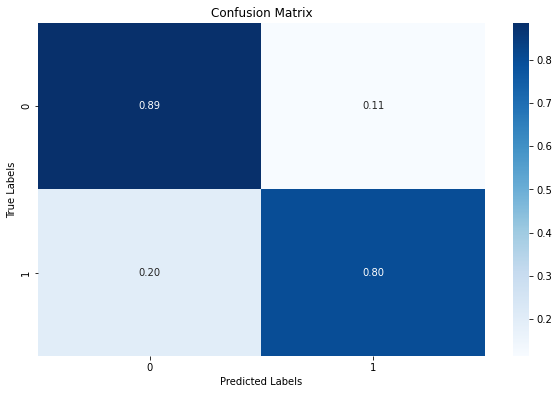

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=72)
sns.heatmap(confusion_matrix(y_test, y_pred_mnb, normalize='true'), annot=True, fmt='.2f', cmap='Blues')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
plt.show()

O modelo `MultinomialNB` demonstrou um desempenho muito próximo ao `LightGBM` em termos de AUC(0.9263), acurácia(0.84) e F1-score(0.84). Veremos adiante que suas métricas também são semelhantes às do `XGBoost`, embora apresente uma  pequena superiodade em relação a esse modelo.


### **Avaliação de Desempenho do modelo XGBoost**

Utilizaremos os hiperparâmetros otimizados anteriormente para treinar o modelo XGBoost. Em seguida, avaliaremos seu desempenho preditivo nos dados de teste, utilizando o F1-score como a métrica principal. Outras métricas, como Acurácia, Precisão e recall serão utilizadas como suporte para uma avaliação mais abrangente.

In [ ]:
xgb_params ={'learning_rate':0.2561427234355878, 'n_estimators':500,
             'max_depth':3,'min_child_weight':1,'gamma':1.0,
             'random_state':0}
xgb_model = XGBClassifier(**xgb_params)
xgb_model.fit(X_train_transform, y_train)
y_pred_xgb = xgb_model.predict(X_test_transform)
y_pred_proba_xgb = xgb_model.predict_proba(X_test_transform)[:, 1]
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
print(classification_report(y_test, y_pred_xgb))
print(f"ROC AUC (XGB): {roc_auc_xgb}")

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       976
           1       0.83      0.86      0.84      1023

    accuracy                           0.84      1999
   macro avg       0.84      0.84      0.84      1999
weighted avg       0.84      0.84      0.84      1999

ROC AUC (XGB): 0.9194489848244477


Abaixo, iremos gerar uma matriz de confusão para visualizar o desempenho do modelo de XGBBoost. A matriz de confusão nos permite observar a distribuição das previsões corretas e incorretas feitas pelo modelo, mostrando a relação entre os rótulos reais e os previstos

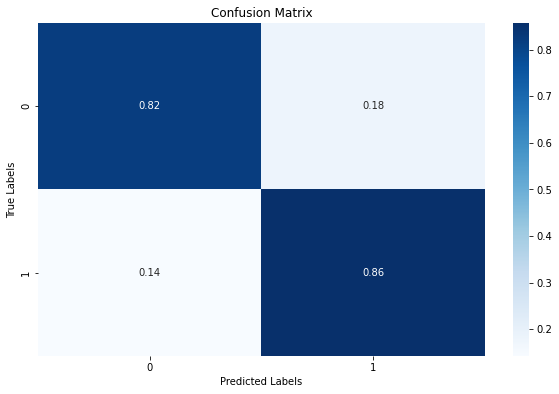

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=72)
sns.heatmap(confusion_matrix(y_test, y_pred_xgb, normalize='true'), annot=True, fmt='.2f', cmap='Blues')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
plt.show()

O `XGBoost` apresentou resultados semelhantes ao MultinomialNB em termos de F1-score de 0.84 e acurácia de 0.84, ficando próximo do `LightGBM`. No entanto, foi inferior ao `LightGBM` em algumas métricas avaliadas, incluindo F1-score, acurácia e AUC. Além disso, também teve uma AUC inferior à do `MultinomialNB` (0.9194).